# 특징 디스크립터 검출기
 - match()
 - knnMatch()
 - radiusMatch()

#### 라이브러리

In [3]:
# installs
#!pip install pytesseract
#!pip install pafy
#!pip install youtube_dl

# Data handling
import numpy as np

import matplotlib.pyplot as plt


# Pytorch
import torch


# OpenCV, OCR
import cv2
import pytesseract
from skimage.transform import resize


# Youtube video
import pafy
import cv2


# Visualizatipn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

# time
from time import time

#### 차량 진입 사진 로드

In [5]:
def imread(filename, flags=cv2.IMREAD_COLOR, dtype=np.uint8):
    try:
        n = np.fromfile(filename, dtype) 
        img = cv2.imdecode(n, flags) 
        return img 
    except Exception as e: 
        print(e) 
        return None

In [6]:
greencar01 = imread('./그린카진입01.jpg')
greencar02 = imread('./그린카진입02.jpg')

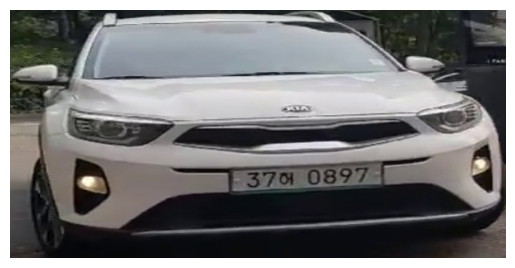

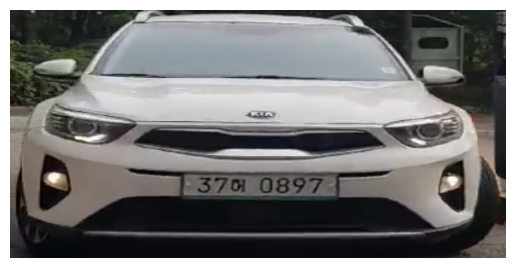

In [5]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

# 이미지 로드
greencar01 = imread('./그린카진입01.jpg')
greencar02 = imread('./그린카진입02.jpg')

# 이미지 출력
plt.imshow(greencar01)
plt.axis('off')  # 축 제거 (선택사항)
plt.show()

plt.imshow(greencar02)
plt.axis('off')
plt.show()


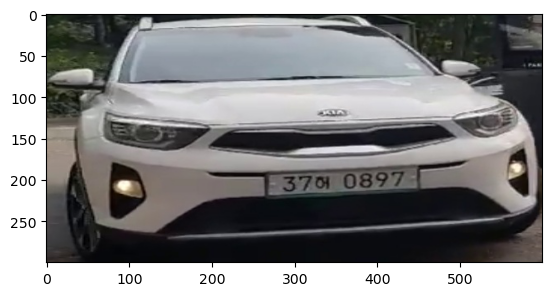

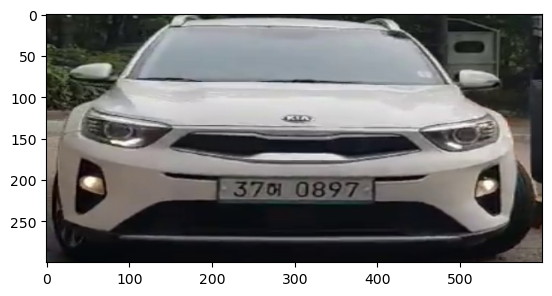

In [7]:
import matplotlib.pyplot as plt

# 이미지 데이터 greencar01, greencar02, socar01을 미리 정의했어야 함
plt.imshow(greencar01)
plt.show()

plt.imshow(greencar02)
plt.show()


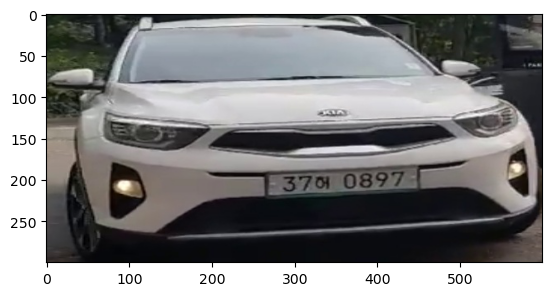

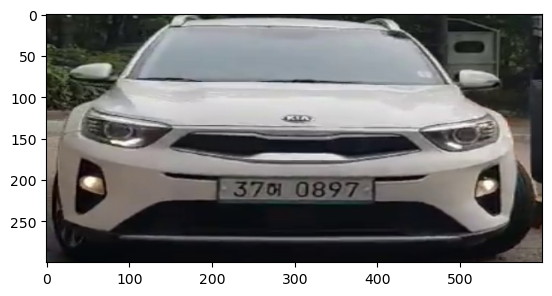

In [9]:
plt.imshow(greencar01); plt.show()
plt.imshow(greencar02); plt.show()

In [13]:
car_images = [greencar01, greencar02]

#### match

match() 함수는 모든 디스크립터를 하나하나 비교하여 매칭점을 찾습니다. 따라서 가장 작은 거리 값과 큰 거리 값의 상위 몇 퍼센트만 골라서 올바른 매칭점을 찾을 수 있습니다.  

아래는 match() 함수를 통해 올바른 매칭점을 찾는 코드입니다. ORB로 디스크립터를 추출하고 BF-Hamming 매칭기로 매칭을 계산했습니다. 매칭 결과의 거리(distance)를 기준으로 정렬하고 거리가 짧은 20%의 매칭점만 골랐습니다.

In [17]:
import cv2  # OpenCV 라이브러리 불러오기

matches:30/186, min:8.00, max:74.00, thresh:21.20


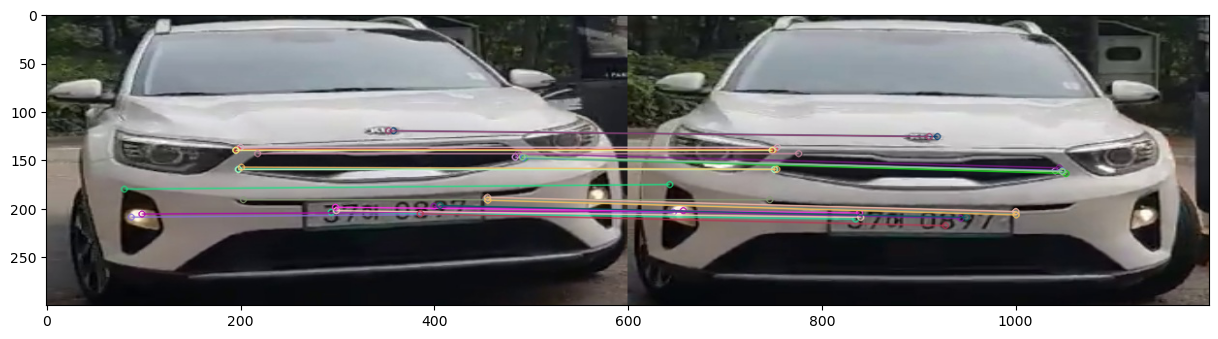

In [19]:
img1 = greencar01
img2 = greencar02
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB로 서술자 추출 ---①
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
# BF-Hamming으로 매칭 ---②
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# 매칭 결과를 거리기준 오름차순으로 정렬 ---③
matches = sorted(matches, key=lambda x:x.distance)
# 최소 거리 값과 최대 거리 값 확보 ---④
min_dist, max_dist = matches[0].distance, matches[-1].distance
# 최소 거리의 15% 지점을 임계점으로 설정 ---⑤
ratio = 0.2
good_thresh = (max_dist - min_dist) * ratio + min_dist
# 임계점 보다 작은 매칭점만 좋은 매칭점으로 분류 ---⑥
good_matches = [m for m in matches if m.distance < good_thresh]
print('matches:%d/%d, min:%.2f, max:%.2f, thresh:%.2f' \
        %(len(good_matches),len(matches), min_dist, max_dist, good_thresh))
# 좋은 매칭점만 그리기 ---⑦
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 결과 출력
plt.figure(figsize=(15, 10))
plt.imshow(res)
plt.show()

matches:42/192, min:12.00, max:70.00, thresh:23.60


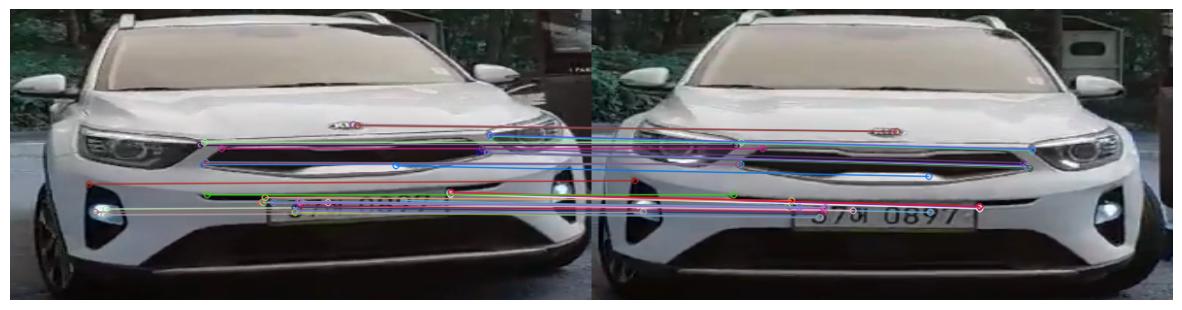

In [23]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 이미지 로드
img1 = imread('./그린카진입01.jpg')
img2 = imread('./그린카진입02.jpg')

# 이미지를 OpenCV 형식으로 변환 (RGB → BGR)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

# Grayscale로 변환
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB로 서술자 추출
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BF-Hamming으로 매칭
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# 매칭 결과를 거리 기준 오름차순으로 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 최소 거리 값과 최대 거리 값 확보
min_dist, max_dist = matches[0].distance, matches[-1].distance

# 최소 거리의 15% 지점을 임계점으로 설정
ratio = 0.2
good_thresh = (max_dist - min_dist) * ratio + min_dist

# 임계점 보다 작은 매칭점만 좋은 매칭점으로 분류
good_matches = [m for m in matches if m.distance < good_thresh]
print('matches:%d/%d, min:%.2f, max:%.2f, thresh:%.2f' \
        % (len(good_matches), len(matches), min_dist, max_dist, good_thresh))

# 좋은 매칭점만 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, 
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
plt.figure(figsize=(15, 10))
plt.imshow(res)
plt.axis('off')  # 축 제거
plt.show()


#### knnMatch
 knnMatch() 함수는 디스크립터당 k개의 최근접 이웃 매칭점을 가까운 순서대로 반환합니다. k개의 최근접 이웃 중 거리가 가까운 것은 좋은 매칭점이고, 거리가 먼 것은 좋지 않은 매칭점일 가능성이 높습니다. 최근접 이웃 중 거리가 가까운 것 위주로 골라내면 좋은 매칭점을 찾아낼 수 있습니다.

matches:108/485


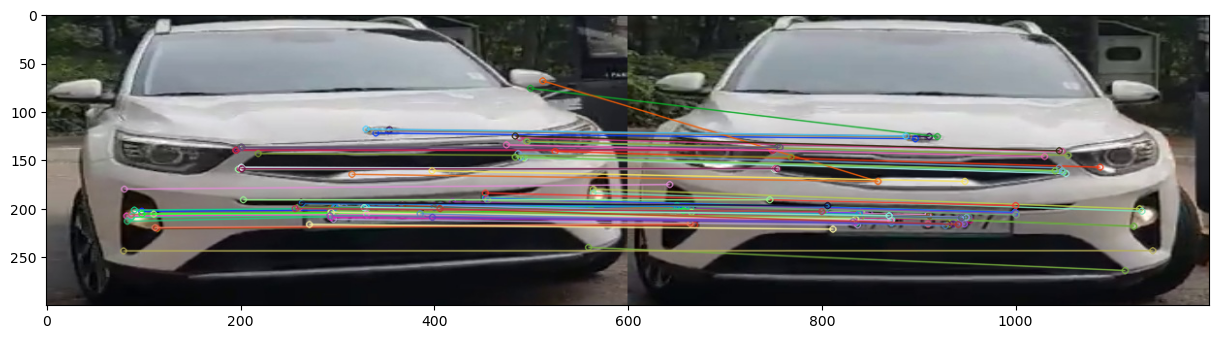

In [26]:
img1 = greencar01
img2 = greencar02
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB로 서술자 추출 ---①
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
# BF-Hamming 생성 ---②
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
# knnMatch, k=2 ---③
matches = matcher.knnMatch(desc1, desc2, 2)

# 첫번재 이웃의 거리가 두 번째 이웃 거리의 75% 이내인 것만 추출---⑤
ratio = 0.75
good_matches = [first for first,second in matches \
                    if first.distance < second.distance * ratio]
print('matches:%d/%d' %(len(good_matches),len(matches)))

# 좋은 매칭만 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 결과 출력
plt.figure(figsize=(15, 10))
plt.imshow(res)
plt.show()

matches:99/486


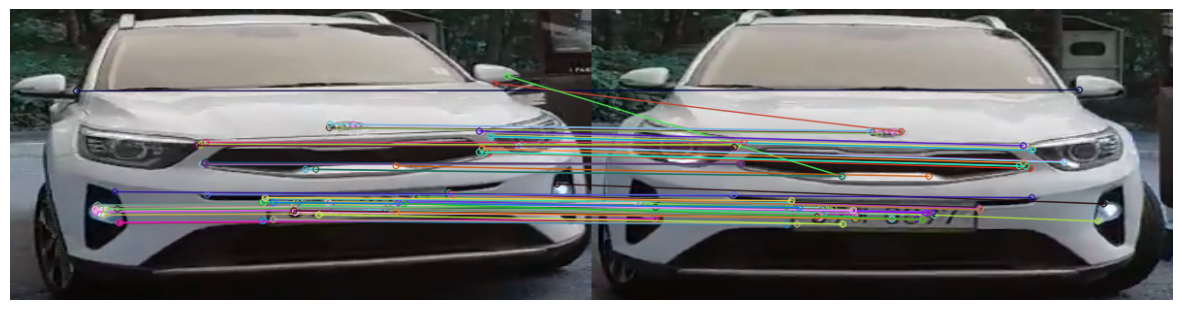

In [28]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 이미지 로드
img1 = imread('./그린카진입01.jpg')
img2 = imread('./그린카진입02.jpg')

# 이미지를 OpenCV 형식으로 변환 (RGB → BGR)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

# Grayscale로 변환
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB로 서술자 추출
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BF-Hamming 생성
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)

# knnMatch, k=2
matches = matcher.knnMatch(desc1, desc2, k=2)

# 첫 번째 이웃의 거리가 두 번째 이웃 거리의 75% 이내인 것만 추출
ratio = 0.75
good_matches = [first for first, second in matches if first.distance < second.distance * ratio]
print('matches:%d/%d' % (len(good_matches), len(matches)))

# 좋은 매칭만 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, 
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
plt.figure(figsize=(15, 10))
plt.imshow(res)
plt.axis('off')  # 축 제거
plt.show()


#### radiusMatch
올바른 매칭점을 활용해 원근 변환 행렬을 구하고, 원본 이미지 크기만큼의 사각형 도형을 원근 변환하여 결과 이미지에 표시하는 코드입니다. 이렇게 함으로써 찾고자 하는 물체가 어디 있는지 표시할 수 있습니다.

In [33]:
import numpy as np  # numpy를 불러옵니다.

good matches:99/486


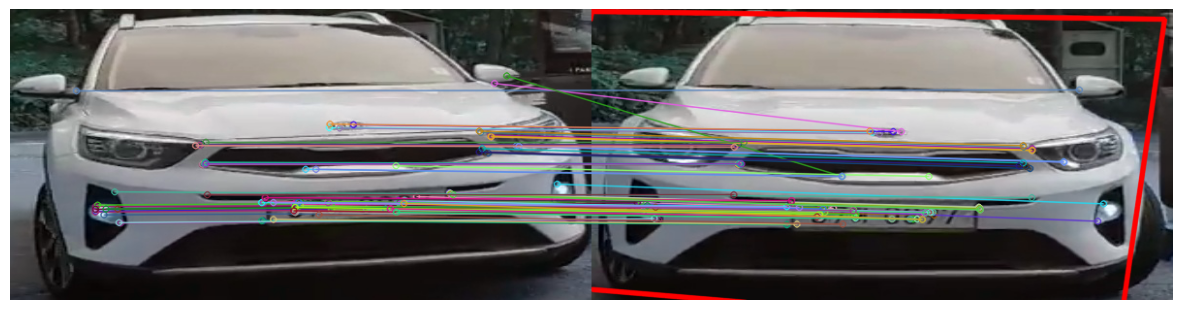

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 이미지 로드
img1 = imread('./그린카진입01.jpg')
img2 = imread('./그린카진입02.jpg')

# 이미지를 OpenCV 형식으로 변환 (RGB → BGR)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

# Grayscale로 변환
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB로 서술자 추출
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BF-Hamming 생성 및 knnMatch 수행
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
matches = matcher.knnMatch(desc1, desc2, k=2)

# 비율 테스트로 좋은 매칭만 추출
ratio = 0.75
good_matches = [first for first, second in matches if first.distance < second.distance * ratio]
print('good matches:%d/%d' % (len(good_matches), len(matches)))

# 좋은 매칭점의 queryIdx로 원본 영상의 좌표 구하기
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
# 좋은 매칭점의 trainIdx로 대상 영상의 좌표 구하기
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# RANSAC으로 변환 행렬 구하기
mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# 원본 이미지의 꼭지점 좌표
h, w = gray1.shape
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, mtrx)

# 변환 좌표 영역을 대상 영상에 그리기
img2_drawable = img2.copy()  # 쓰기 가능 복사본 생성
img2_drawable = cv2.polylines(img2_drawable, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

# 좋은 매칭 그려서 출력
res = cv2.drawMatches(img1, kp1, img2_drawable, kp2, good_matches, None, 
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(res)
plt.axis('off')  # 축 제거
plt.show()


# 알고리즘 및 자료구조 사용 코드

good matches:99/486


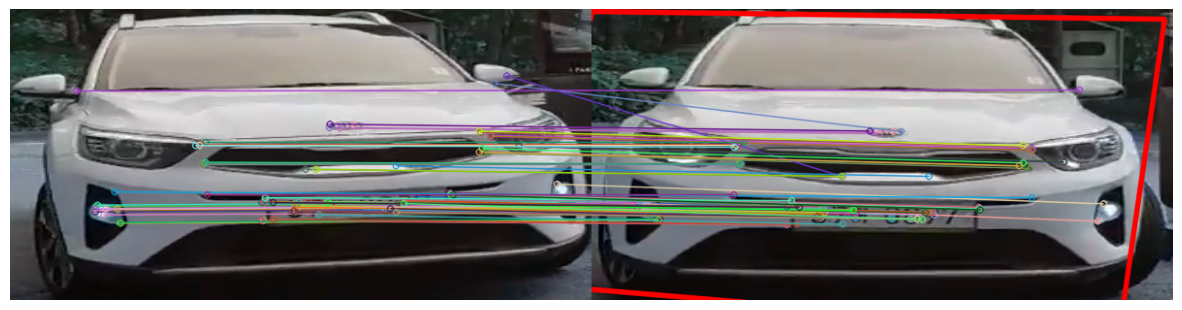

In [40]:
# 필요한 라이브러리 임포트
import cv2  # OpenCV: 컴퓨터 비전 작업
import numpy as np  # Numpy: 다차원 배열 및 수학 연산
import matplotlib.pyplot as plt  # Matplotlib: 시각화
from matplotlib.image import imread  # 이미지 로드

# 1. 데이터 준비
# 두 이미지를 로드합니다.
img1 = imread('./그린카진입01.jpg')
img2 = imread('./그린카진입02.jpg')

# 이미지를 OpenCV 형식으로 변환 (RGB → BGR)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

# Grayscale로 변환 (특징점 추출을 위해 색상 정보 제거)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 2. 특징점 추출 및 서술자 계산
# ORB (Oriented FAST and Rotated BRIEF) 알고리즘 사용
# ORB는 FAST(특징점 탐지)와 BRIEF(특징점 서술자)를 결합한 방식
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)  # 첫 번째 이미지의 특징점 및 서술자 추출
kp2, desc2 = detector.detectAndCompute(gray2, None)  # 두 번째 이미지의 특징점 및 서술자 추출

# 3. 특징점 매칭
# BFMatcher (Brute-Force Matcher)를 사용하여 서술자를 비교
# NORM_HAMMING2는 이진 서술자 간의 해밍 거리 계산 방식
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)

# knnMatch를 통해 가장 가까운 두 매칭 점(k=2) 검색
matches = matcher.knnMatch(desc1, desc2, k=2)

# 4. 매칭 점 필터링 (비율 테스트)
# Lowe's ratio test 적용
# 첫 번째 이웃의 거리와 두 번째 이웃 거리의 비율이 설정된 임계값 이하일 때만 "좋은 매칭"으로 간주
ratio = 0.75
good_matches = [first for first, second in matches if first.distance < second.distance * ratio]
print('good matches:%d/%d' % (len(good_matches), len(matches)))

# 5. 변환 행렬 계산
# 좋은 매칭점의 queryIdx로 원본 이미지의 좌표 추출
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# 좋은 매칭점의 trainIdx로 대상 이미지의 좌표 추출
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# RANSAC (Random Sample Consensus)을 사용하여 변환 행렬 (호모그래피) 계산
# RANSAC은 외부값(Outliers)을 제거하고 최적의 변환 행렬을 계산하는 알고리즘
mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# 6. 변환 영역 시각화
# 원본 이미지의 꼭지점 좌표 정의
h, w = gray1.shape
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

# 변환 행렬을 적용하여 대상 이미지로 좌표 변환
dst = cv2.perspectiveTransform(pts, mtrx)

# 대상 이미지에 변환 영역 표시
img2_drawable = img2.copy()  # 쓰기 가능 복사본 생성
img2_drawable = cv2.polylines(img2_drawable, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

# 7. 매칭 결과 시각화
# 좋은 매칭점만 시각화하여 결과 출력
res = cv2.drawMatches(img1, kp1, img2_drawable, kp2, good_matches, None, 
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 이미지 출력
plt.figure(figsize=(15, 10))
plt.imshow(res)
plt.axis('off')  # 축 제거
plt.show()


## 1. ORB (Oriented FAST and Rotated BRIEF)
#### 핵심 설명: ORB는 이미지의 특징점을 추출하고 이를 고유한 특징으로 변환하는 알고리즘입니다. FAST를 사용하여 특징점을 검출하고, BRIEF를 통해 이를 서술자로 변환합니다. ORB는 빠르고 강력한 특징 추출 알고리즘으로, 특히 이미지 매칭에서 유용합니다.
#### 알아두어야 할 점: ORB는 회전 불변성과 스케일 불변성을 갖추고 있어, 다양한 조건에서 매칭을 잘 수행합니다. 다만, 복잡한 환경에서는 다른 알고리즘보다 성능이 떨어질 수 있습니다.
## 2. 서술자(Descriptors)
#### 핵심 설명: 서술자는 이미지에서 추출된 특징점이 가진 고유한 특성을 숫자 벡터로 나타낸 것입니다. 매칭 과정에서 서술자들이 얼마나 비슷한지를 계산하여 두 이미지 간의 유사성을 측정합니다.
#### 알아두어야 할 점: 서술자의 품질과 수는 매칭 성능에 큰 영향을 미칩니다. 좋은 서술자는 서로 다른 이미지에서도 일관된 특징을 잡아내어 매칭의 정확도를 높입니다.
## 3. 매칭(Matching)
#### 핵심 설명: 매칭은 두 이미지에서 추출한 서술자들을 비교하여 서로 대응되는 특징점을 찾는 과정입니다. 이 과정에서 BFMatcher(Brute-Force Matcher)와 같은 방법을 사용하여 서술자들 간의 거리를 계산합니다.
#### 알아두어야 할 점: 매칭의 정확도는 서술자 간의 거리 계산 방식에 달려 있습니다. 이 코드에서는 Hamming 거리를 사용해 ORB 서술자의 유사도를 측정하고, 교차 검증을 통해 잘못된 매칭을 배제합니다.
## 4. KNN 매칭 (k-Nearest Neighbors Matching)
#### 핵심 설명: k-NN 매칭은 각 서술자에 대해 가장 가까운 k개의 서술자를 찾아서 매칭을 수행하는 방법입니다. 이 코드에서는 k=2로 두 번째 이웃의 거리와 첫 번째 이웃의 거리를 비교하여 신뢰할 수 있는 매칭을 추려냅니다.
#### 알아두어야 할 점: k-NN을 사용할 때 첫 번째 이웃이 두 번째 이웃보다 훨씬 더 가까운 경우가 좋은 매칭입니다. 그렇지 않으면 잘못된 매칭이 발생할 수 있습니다. 일반적으로 첫 번째 이웃과 두 번째 이웃의 거리 차이가 75% 이하일 때만 유효한 매칭으로 분류합니다.
## 5. 매칭 결과 필터링 (Good Matches)
#### 핵심 설명: 매칭 후, 매칭 결과의 품질을 개선하기 위해 좋은 매칭점만 필터링합니다. 비율 기반 필터링을 통해 첫 번째 이웃의 거리가 두 번째 이웃의 거리보다 일정 비율 이상 차이 나는 경우만 유효한 매칭으로 간주합니다.
#### 알아두어야 할 점: 이 필터링 과정을 통해 잘못된 매칭을 제거하고, 신뢰할 수 있는 매칭점만 선택하여 정확도를 높입니다. 필터링 기준인 비율(ratio)은 주로 0.75로 설정되며, 이는 매칭의 품질에 따라 조정할 수 있습니다.
## 6. Homography (변환 행렬)
#### 핵심 설명: Homography는 한 이미지에서 다른 이미지로의 변환을 정의하는 행렬입니다. 좋은 매칭점들로부터 계산한 변환 행렬을 사용해 한 이미지의 좌표를 다른 이미지로 변환하여 정렬할 수 있습니다.
#### 알아두어야 할 점: Homography는 두 이미지 간의 기하학적인 관계를 모델링하는 데 사용됩니다. 이를 통해 두 이미지를 정렬하거나, 이미지를 합성할 수 있습니다. 그러나 Homography를 정확하게 계산하려면 충분히 좋은 매칭점들이 필요합니다.
## 7. 매칭의 신뢰도
#### 핵심 설명: 전체 매칭점 중에서 20% 이상이 좋은 매칭점으로 분류되면 신뢰할 수 있다고 판단할 수 있습니다. 이는 매칭된 특징점들이 이미지에서 충분히 일관성 있게 대응된다는 의미입니다.
#### 알아두어야 할 점: 매칭의 신뢰성은 매칭된 특징점의 수와 비율에 따라 다릅니다. 예를 들어, 20% 이하의 매칭점이 좋은 매칭점이라면 신뢰도가 낮다고 할 수 있으며, 반대로 50% 이상의 좋은 매칭점이 발견되면 신뢰도가 높다고 할 수 있습니다.
## 8. RANSAC (Random Sample Consensus)
#### 핵심 설명: RANSAC은 좋은 매칭점들을 사용해 기하학적인 모델을 추정하는 방법입니다. 이 방법을 통해 이상치(잘못된 매칭점)를 배제하고, 신뢰할 수 있는 변환 행렬을 계산합니다.
#### 알아두어야 할 점: RANSAC은 반복적으로 샘플을 선택하고, 이 샘플에서 계산한 변환 행렬이 얼마나 잘 맞는지 평가하여 최적의 변환 행렬을 찾습니다. 이 과정에서 잘못된 매칭점들이 걸러지므로 정확한 변환을 얻을 수 있습니다.
## 핵심적인 설명들:
#### 매칭 점이 20% 이상이면 신뢰할 수 있음: 전체 매칭점 중에서 20%가 좋은 매칭으로 분류되면, 해당 매칭이 유효하고 정확한 가능성이 큽니다.
#### 첫 번째 이웃과 두 번째 이웃의 거리 차이: k-NN 매칭에서 첫 번째 이웃과 두 번째 이웃의 거리 차이가 적으면 잘못된 매칭이 될 확률이 큽니다.
#### Homography를 통한 정합성: 매칭된 특징점들로부터 계산한 변환 행렬을 사용해 두 이미지를 비교하고 정합성을 평가할 수 있습니다.
#### RANSAC으로 잘못된 매칭 제거: 잘못된 매칭을 제거하고 정확한 변환 행렬을 계산하여 이미지 정렬의 정확성을 높입니다.